### What You're Aiming For

In this checkpoint, you are going to work on the '5G-Energy consumption' dataset that was provided by the  international telecommunication union (ITU) in 2023 as part of a global challenge or competition for data scientists all over the world to solve the 5G energy consumption modelling using machine learning techniques.

The competition is taking place from 2023-07-05 to 2023-09-30. Fore more information click here.

Checkpoint problematic : Network operational expenditure (OPEX) already accounts for around 25 percent of the total telecom operator’s cost, and 90 percent of it is spent on large energy bills. More than 70 percent of this energy is estimated to be consumed by the radio access network (RAN), particularly by the base stations (BSs). Thus, the objective is to build and train a ML model to estimate the energy consumed by different 5G base stations taking into consideration the impact of various engineering configurations, traffic conditions, and energy-saving methods.

Dataset description : This dataset is derived from the original copy and simplified for learning purposes. It includes cell-level traffic statistics of 4G/5G sites collected on different days.

➡️ Dataset link

https://i.imgur.com/Agu9zeP.jpg

 


Instructions

Import you data and perform basic data exploration phase
Display general information about the dataset
Create a pandas profiling reports to gain insights into the dataset
Handle Missing and corrupted values
Remove duplicates, if they exist
Handle outliers, if they exist
Encode categorical features
Select your target variable and the features
Split your dataset to training and test sets
Based on your data exploration phase select a ML regression algorithm and train it on the training set
Assess your model performance on the test set using relevant evaluation metrics
Discuss with your cohort alternative ways to improve your model performance

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Import libraries for machine learning models and evaluation
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For scaling numerical data and encoding categorical data
from sklearn.linear_model import LinearRegression, ElasticNet  # For linear Regression
from sklearn.tree import DecisionTreeRegressor  # For Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor  # For Random Forest Regression
from sklearn.svm import SVR  # For Support Vector Regression 
import xgboost as xgb # For XGBoost Regression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer  # For model evaluation metrics

In [57]:
energy_df = pd.read_csv("5G_energy_consumption_dataset.csv")

In [58]:
energy_df.head()

,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719


In [59]:
# Display general information about the dataset
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     92629 non-null  object 
 1   BS       92629 non-null  object 
 2   Energy   92629 non-null  float64
 3   load     92629 non-null  float64
 4   ESMODE   92629 non-null  float64
 5   TXpower  92629 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.2+ MB


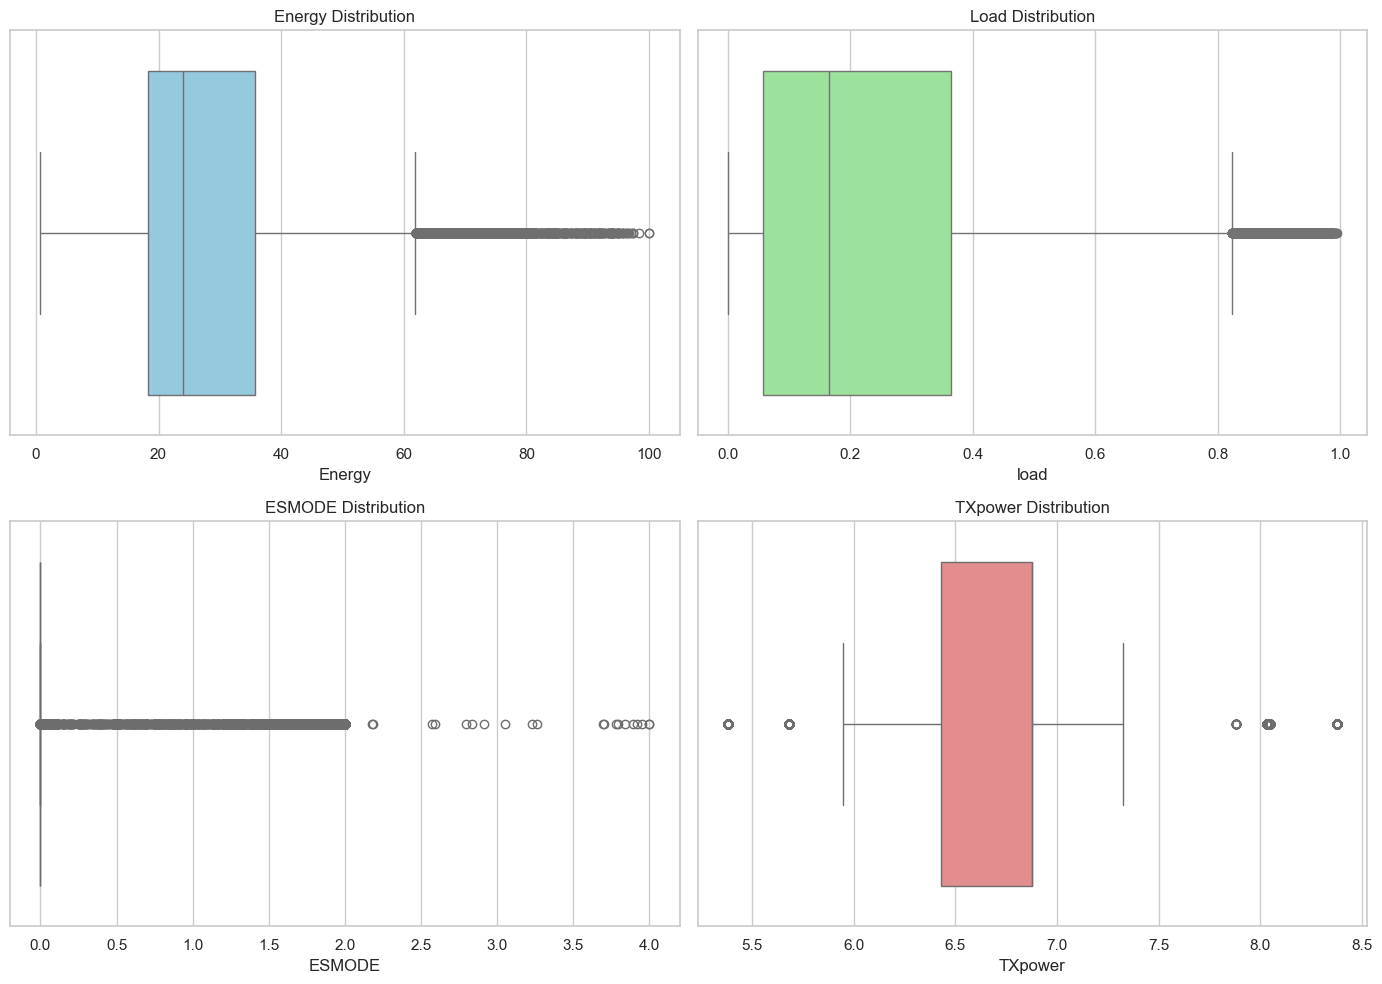

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better visualization
sns.set(style="whitegrid")

# Plot distributions of the key numerical features to check for outliers
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Distribution plot for Energy consumption
sns.boxplot(x=energy_df['Energy'], ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title("Energy Distribution")

# Distribution plot for load
sns.boxplot(x=energy_df['load'], ax=axes[0, 1], color="lightgreen")
axes[0, 1].set_title("Load Distribution")

# Distribution plot for ESMODE
sns.boxplot(x=energy_df['ESMODE'], ax=axes[1, 0], color="salmon")
axes[1, 0].set_title("ESMODE Distribution")

# Distribution plot for TXpower
sns.boxplot(x=energy_df['TXpower'], ax=axes[1, 1], color="lightcoral")
axes[1, 1].set_title("TXpower Distribution")

plt.tight_layout()
plt.show()

In [61]:
from ydata_profiling import ProfileReport

In [62]:
profile = ProfileReport(energy_df, title='Pandas Profiling Report', explorative = True)

In [63]:
energy_df = energy_df.drop("ESMODE", axis = 1)

In [64]:
energy_df = energy_df.drop("Time", axis = 1)

In [65]:
energy_df

,BS,Energy,load,TXpower
0,B_0,64.275037,0.487936,7.101719
1,B_0,55.904335,0.344468,7.101719
2,B_0,57.698057,0.193766,7.101719
3,B_0,55.156951,0.222383,7.101719
4,B_0,56.053812,0.175436,7.101719
...,...,...,...,...
92624,B_1018,14.648729,0.087538,7.325859
92625,B_1018,14.648729,0.082635,7.325859
92626,B_1018,13.452915,0.055538,7.325859
92627,B_1018,13.602392,0.058077,7.325859


In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
le = LabelEncoder()
energy_df["BS"] = le.fit_transform(energy_df["BS"])

In [68]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BS       92629 non-null  int32  
 1   Energy   92629 non-null  float64
 2   load     92629 non-null  float64
 3   TXpower  92629 non-null  float64
dtypes: float64(3), int32(1)
memory usage: 2.5 MB


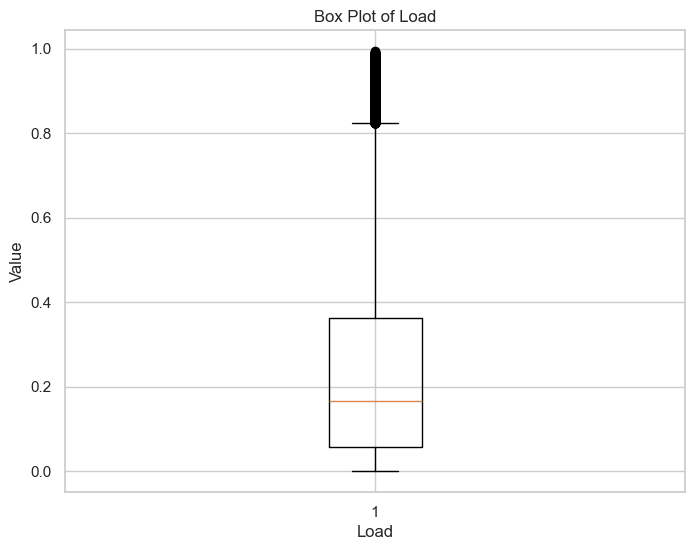

In [69]:
# Ensure inline plotting for Jupyter notebooks or notebook environments
%matplotlib inline  

import matplotlib.pyplot as plt

# Assuming energy_df is already defined and contains a 'load' column.
plt.figure(figsize=(8, 6))
plt.boxplot(energy_df["load"])

# Adding titles and labels
plt.title("Box Plot of Load")
plt.xlabel("Load")
plt.ylabel("Value")  # Y-axis label for the range of values in the 'load' column

# Show the plot
plt.show()

In [70]:
X = energy_df.drop(columns=['Energy'])
y = energy_df['Energy']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X: Features (independent variables) in the dataset
# y: Target (dependent variable) in the dataset

# test_size=0.2: Specifies that 20% of the data should be used for the test set, 
# and the remaining 80% for the training set.

# random_state=42: Ensures that the data is split in the same way every time you run the code, 
# providing reproducibility. The number 42 is arbitrary and can be any integer.

# X_train: Training data for the features
# X_test: Testing data for the features

# y_train: Training data for the target
# y_test: Testing data for the target

In [72]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

### Linear Regression

In [74]:
# Initialize the model
lin_reg = LinearRegression()

# Fit the model
lin_reg.fit(X_train_scaled, y_train)

# Predicting on test data
y_pred_lr = lin_reg.predict(X_test_scaled)

# Model evaluation
print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))

Linear Regression RMSE: 9.592962805
Linear Regression R2 Score: 0.5151638223607956


### Elastic Net Regression

In [76]:
from sklearn.linear_model import ElasticNet

# Initialize the Elastic Net model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

# Fit the model
elastic_net.fit(X_train_scaled, y_train)

# Predicting on test data
y_pred_en = elastic_net.predict(X_test_scaled)

# Model evaluation
print("Elastic Net RMSE:", mean_squared_error(y_test, y_pred_en, squared=False))
print("Elastic Net R2 Score:", r2_score(y_test, y_pred_en))

Elastic Net RMSE: 9.595750083385305
Elastic Net R2 Score: 0.5148820387763862


#### 3. Decision Tree Regression

In [78]:
# Initialize the model with some parameters
tree_reg = DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)

# Fit the model
tree_reg.fit(X_train_scaled, y_train)

# Predicting on test data
y_pred_tree = tree_reg.predict(X_test_scaled)

# Model evaluation
print("Decision Tree RMSE:", mean_squared_error(y_test, y_pred_tree, squared=False))
print("Decision Tree R2 Score:", r2_score(y_test, y_pred_tree))

Decision Tree RMSE: 6.099604855505518
Decision Tree R2 Score: 0.803983378077745


#### 4. Random Forest Regression

In [80]:
# Initialize the model with some parameters
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)

# Fit the model
rf_reg.fit(X_train_scaled, y_train)

# Predicting on test data
y_pred_rf = rf_reg.predict(X_test_scaled)

# Model evaluation
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))

Random Forest RMSE: 4.619810850211676
Random Forest R2 Score: 0.8875555857193493


#### 5. Support Vector Regression (SVR)

In [82]:
# Initialize the model with some parameters
svr_reg = SVR(kernel='rbf', C=100, epsilon=0.1)

# Fit the model
svr_reg.fit(X_train_scaled, y_train)

# Predicting on test data
y_pred_svr = svr_reg.predict(X_test_scaled)

# Model evaluation
print("SVR RMSE:", mean_squared_error(y_test, y_pred_svr, squared=False))
print("SVR R2 Score:", r2_score(y_test, y_pred_svr))

SVR RMSE: 7.058495090960337
SVR R2 Score: 0.7375094145343631


#### 6. XGBoost  (eXtreme Gradient Boosting)  Regression

In [84]:
# Initialize the model with some parameters
xgb_reg = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=6)

# Fit the model
xgb_reg.fit(X_train_scaled, y_train)

# Predicting on test data
y_pred_xgb = xgb_reg.predict(X_test_scaled)

# Model evaluation
print("XGBoost RMSE:", mean_squared_error(y_test, y_pred_xgb, squared=False))
print("XGBoost R2 Score:", r2_score(y_test, y_pred_xgb))

XGBoost RMSE: 4.534745239121939
XGBoost R2 Score: 0.8916583901293004


#### 7. LightGBM (Light Gradient Boosting Machine)

In [86]:
import lightgbm as lgb

# Initialize the LightGBM regressor model
lgbm_model = lgb.LGBMRegressor(random_state=42)

# Train the model on the scaled training data
lgbm_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = lgbm_model.predict(X_test_scaled)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 551
[LightGBM] [Info] Number of data points in the train set: 74103, number of used features: 3
[LightGBM] [Info] Start training from score 28.169891
Mean Squared Error: 16.637769940734213
R2 Score: 0.9123434018251478


### With Cross Validation

In [88]:
# Import the necessary functions from scikit-learn
from sklearn.metrics import make_scorer  # To create custom scoring functions
from sklearn.model_selection import cross_validate  # To perform cross-validation

In [89]:
# Initialize the XGBoost model
model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.02, max_depth=7, random_state=42)

# Create custom scorers for RMSE and R²
# `make_scorer` allows using custom metrics or built-in metrics in cross-validation
rmse_scorer = make_scorer(mean_squared_error, squared=False)
r2_scorer = make_scorer(r2_score)

# Dictionary of scoring metrics
scoring = {'RMSE': rmse_scorer, 'R2': r2_scorer}

# Perform cross-validation
# `cross_validate` splits the data into folds, trains and tests the model, and calculates the scores
cv_results = cross_validate(model, X, y, scoring=scoring, cv=5, return_train_score=True)
# Note that we are using X and y and not X_train and y_train

# Output the results
# `cv_results` contains the scores for each fold
print("RMSE scores:", cv_results['test_RMSE'])  # RMSE scores for each fold
print("R² scores:", cv_results['test_R2'])  # R² scores for each fold
print("Average RMSE:", cv_results['test_RMSE'].mean())  # Average RMSE across all folds
print("Average R²:", cv_results['test_R2'].mean())  # Average R² score across all folds

RMSE scores: [ 6.65697401  5.33946021  7.06939895  6.22150669 11.41136288]
R² scores: [0.79533036 0.83302464 0.77570855 0.78470735 0.26394873]
Average RMSE: 7.339740548577554
Average R²: 0.690543927343468


In [90]:
# We'll use XGBoost and tune the n_estimators, learning_rate, and max_depth.

# Initialize the best RMSE and best R² to extreme values to ensure any calculated values will be better
best_rmse = float('inf')
best_r2 = -float('inf')
best_params = {}

# Iterate over different values for n_estimators, learning_rate, and max_depth
for n_estimators in [50, 100, 200]:  # Number of boosting rounds
    for learning_rate in [0.01, 0.1, 0.2]:  # Step size at each iteration
        for max_depth in range(3, 10, 2):  # Maximum depth of each tree

            # Initialize the XGBoost model with the current set of hyperparameters
            xgb_reg = xgb.XGBRegressor(
                n_estimators=n_estimators,       # Number of boosting rounds
                learning_rate=learning_rate,     # Step size at each iteration
                max_depth=max_depth,             # Maximum depth of each tree
                random_state=42                  # Ensures reproducibility
            )
            
            # Train the model using the training data
            xgb_reg.fit(X_train, y_train)
            
            # Predict the target values for the test data
            y_pred_xgb = xgb_reg.predict(X_test)
            
            # Calculate Root Mean Squared Error (RMSE) and R² score for the current model
            rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)
            r2 = r2_score(y_test, y_pred_xgb)
            
            # Check if the current RMSE is better (lower) than the best RMSE so far
            if rmse < best_rmse:
                # Update the best RMSE, R² score, and the best parameters
                best_rmse = rmse
                best_r2 = r2
                best_params = {
                    'n_estimators': n_estimators, 
                    'learning_rate': learning_rate, 
                    'max_depth': max_depth
                }

# Print the best hyperparameters and corresponding RMSE and R² score
print("Best Parameters for XGBoost:", best_params)
print("Best RMSE for XGBoost:", best_rmse)
print("Best R² Score for XGBoost:", best_r2)

Best Parameters for XGBoost: {'n_estimators': 200, 'learning_rate': 0.2, 'max_depth': 7}
Best RMSE for XGBoost: 3.385698328798997
Best R² Score for XGBoost: 0.9396070817292541
